# 1 - Libraries and Data Reading

In [1]:
# Manipulation
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Training and classification
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Models
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df_train = pd.read_csv("/kaggle/input/adult-pmr3508/train_data.csv",sep=r'\s*,\s*',engine='python',na_values="?")
df_test = pd.read_csv("/kaggle/input/adult-pmr3508/test_data.csv",sep=r'\s*,\s*',engine='python',na_values="?")

In [3]:
df_train.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [4]:
df_train.describe()

,Id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,32559.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,16280.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,24419.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,32559.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,40699.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,48839.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
print(df_train.info(), "\n")
null_columns = df_train.columns[df_train.isnull().any()]
null_counts = df_train[null_columns].isnull().sum()
print("\033[91mMissing values no dataset de treino:\033[0m")
print(null_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       30724 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education.num   32560 non-null  int64 
 6   marital.status  32560 non-null  object
 7   occupation      30717 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital.gain    32560 non-null  int64 
 12  capital.loss    32560 non-null  int64 
 13  hours.per.week  32560 non-null  int64 
 14  native.country  31977 non-null  object
 15  income          32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB
None 

Missing values no dataset de treino:
workc

In [6]:
null_columns = df_test.columns[df_test.isnull().any()]
null_counts = df_test[null_columns].isnull().sum()
print("\033[91mMissing values no dataset de teste:\033[0m")
print(null_counts)

Missing values no dataset de teste:
workclass         963
occupation        966
native.country    274
dtype: int64


# 2 - Preparation and Cleaning

In [7]:
X_all = df_train.drop(['Id','education','relationship'],axis=1)
X_test = df_test.drop(['Id','education','relationship'],axis=1)
ids = df_test['Id']

In [8]:
# Encode categorical variables
missing_columns = ['occupation', 'workclass', 'native.country']
encoder = OrdinalEncoder()
X_all[missing_columns] = encoder.fit_transform(X_all[missing_columns])
X_test[missing_columns] = encoder.transform(X_test[missing_columns])

# Find the nearest neighbors and impute the missing values
imputer = KNNImputer(n_neighbors=5)
X_all[missing_columns] = imputer.fit_transform(X_all[missing_columns])
X_test[missing_columns] = imputer.transform(X_test[missing_columns])

# Decode categorical variables back to original categories
X_all[missing_columns] = encoder.inverse_transform(X_all[missing_columns])
X_test[missing_columns] = encoder.inverse_transform(X_test[missing_columns])

# Verify the imputation
print(X_all[missing_columns].isnull().sum())
print(X_test[missing_columns].isnull().sum())

occupation        0
workclass         0
native.country    0
dtype: int64
occupation        0
workclass         0
native.country    0
dtype: int64


In [9]:
casados = ['Married-civ-spouse', 'Married-AF-spouse']

X_all['marital.status'] = np.where(X_all['marital.status'].isin(casados), 1, 0)
X_test['marital.status'] = np.where(X_test['marital.status'].isin(casados), 1, 0)

In [10]:
countries = ['United-States','Mexico']

X_all['native.country'] = np.where(~X_all['native.country'].isin(countries), 'Other', X_all['native.country'])
X_test['native.country'] = np.where(~X_test['native.country'].isin(countries), 'Other', X_test['native.country'])

In [11]:
to_scale_standard = ['age', 'fnlwgt', 'education.num','hours.per.week','capital.gain','capital.loss']
X_all[to_scale_standard] = StandardScaler().fit_transform(X_all[to_scale_standard])
X_test[to_scale_standard] = StandardScaler().fit_transform(X_test[to_scale_standard])

In [12]:
X_all['income'] = np.where(X_all['income'] == '>50K', 1, 0)
X_all['sex'] = LabelEncoder().fit_transform(X_all['sex'].astype(str))
X_test['sex'] = LabelEncoder().fit_transform(X_test['sex'].astype(str))

categorical_cols = ['workclass', 'occupation', 'native.country', 'race']
X_all = pd.get_dummies(X_all, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

In [13]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           32560 non-null  float64
 1   fnlwgt                        32560 non-null  float64
 2   education.num                 32560 non-null  float64
 3   marital.status                32560 non-null  int64  
 4   sex                           32560 non-null  int64  
 5   capital.gain                  32560 non-null  float64
 6   capital.loss                  32560 non-null  float64
 7   hours.per.week                32560 non-null  float64
 8   income                        32560 non-null  int64  
 9   workclass_Federal-gov         32560 non-null  bool   
 10  workclass_Local-gov           32560 non-null  bool   
 11  workclass_Never-worked        32560 non-null  bool   
 12  workclass_Private             32560 non-null  bool   
 13  w

# 3 - Modeling

Separation of data into target and input

In [14]:
y_all = X_all['income']
X_all = X_all.drop('income',axis=1)

X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

## Hyperparameter Search

### Logistic Regression

In [15]:
logistic = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],                # Regularization strength
    'solver': ['liblinear', 'saga'],             # Algorithm to use in the optimization problem
    'penalty': ['l1', 'l2', 'elasticnet', None]  # Specify the norm used in the penalization
}

grid_logistic = GridSearchCV(estimator=logistic, 
                             param_grid=param_grid, 
                             cv=5, 
                             scoring='accuracy', 
                             n_jobs=-1)
grid_search_logistic=grid_logistic.fit(X_train, y_train.values.ravel())

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

In [16]:
print('Melhor parâmetro:',grid_search_logistic.best_params_)
print(f'Acurácia sobre o dataset de treino: {grid_search_logistic.best_score_*100:.2f}%')

Melhor parâmetro: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Acurácia sobre o dataset de treino: 85.06%


### Random Forest

In [17]:
random_forest = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(100, 300),                    # Number of trees in the forest.
    'max_depth': [None] + list(randint(10, 30).rvs(20)),  # Maximum depth of the tree
    'min_samples_split': randint(2, 10),                  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 4),                    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                            # Whether bootstrap samples are used when building trees
}

random_search_random_forest = RandomizedSearchCV(estimator=random_forest, 
                                                 param_distributions=param_dist, 
                                                 n_iter=100, 
                                                 cv=5, 
                                                 scoring='accuracy', 
                                                 random_state=42,
                                                 n_jobs=-1)
random_search_random_forest.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 26, 25, 16, 22, 27,
                                                      14, 14, 22, 19, 22, 25,
                                                      26, 16, 25, 23, 16, 10,
                                                      18, 17, 23],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79ee7eed2ad0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79ee7f747e50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79ee7eed3370>},
                   random_state=42, scoring='accuracy')

In [18]:
print('Melhor parâmetro:',random_search_random_forest.best_params_)
print(f'Acurácia sobre o dataset de treino: {random_search_random_forest.best_score_*100:.2f}%')

Melhor parâmetro: {'bootstrap': False, 'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 290}
Acurácia sobre o dataset de treino: 86.51%


### SVM

In [19]:
svm = SVC()
param_grid = {
    'C': [1, 10, 20],                     # Regularization strength
    'gamma': ['auto', 'scale'],           # Kernel coefficient for 'rbf' and 'poly'
    'kernel': ['linear', 'rbf', 'poly'],  # Specifies the kernel type
    'degree': [2,3]                       # Degree of the polynomial kernel function
}

grid_svm = GridSearchCV(estimator=svm, 
                        param_grid=param_grid, 
                        cv=5, 
                        scoring='accuracy', 
                        n_jobs=-1)
grid_search_svm=grid_svm.fit(X_train, y_train.values.ravel())

In [20]:
print('Melhor parâmetro:',grid_search_svm.best_params_)
print(f'Acurácia sobre o dataset de treino: {grid_search_svm.best_score_*100:.2f}%')

Melhor parâmetro: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Acurácia sobre o dataset de treino: 85.66%


### Boosted Classifier

In [21]:
ab = AdaBoostClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150, 200],    # The maximum number of estimators at which boosting is terminated
    'learning_rate': [0.01, 0.1, 1],        # Weight applied to each classifier at each boosting iteration
    'estimator': [DecisionTreeClassifier(max_depth=1), 
                  DecisionTreeClassifier(max_depth=2),
                  DecisionTreeClassifier(max_depth=3)
                  ]                         # The base estimator from which the boosted ensemble is built
}

grid_ab = GridSearchCV(estimator=ab,
                       param_grid=param_grid,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)
grid_search_ab = grid_ab.fit(X_train, y_train.values.ravel())

In [22]:
print('Melhor parâmetro:',grid_search_ab.best_params_)
print(f'Acurácia sobre o dataset de treino: {grid_search_ab.best_score_*100:.2f}%')

Melhor parâmetro: {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.1, 'n_estimators': 200}
Acurácia sobre o dataset de treino: 87.14%


## Training the best models

In [23]:
best_lr = LogisticRegression(**grid_search_logistic.best_params_)
best_rf = RandomForestClassifier(**random_search_random_forest.best_params_)
best_svm = SVC(**grid_search_svm.best_params_)
best_ab = AdaBoostClassifier(**grid_search_ab.best_params_)

best_lr.fit(X_train, y_train)
best_rf.fit(X_train, y_train)
best_svm.fit(X_train, y_train)
best_ab.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=200)

## Model Evaluation

### Validation set classification and metrics calculation

In [24]:
models = {
    'Logistic Regression': best_lr,
    'Random Forest': best_rf,
    'SVC': best_svm,
    'AdaBoost': best_ab
}

# Evaluate each model
results = {}
for name, model in models.items():
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_val, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'conf_matrix': conf_matrix
    }

### Confusion Matrix Plot

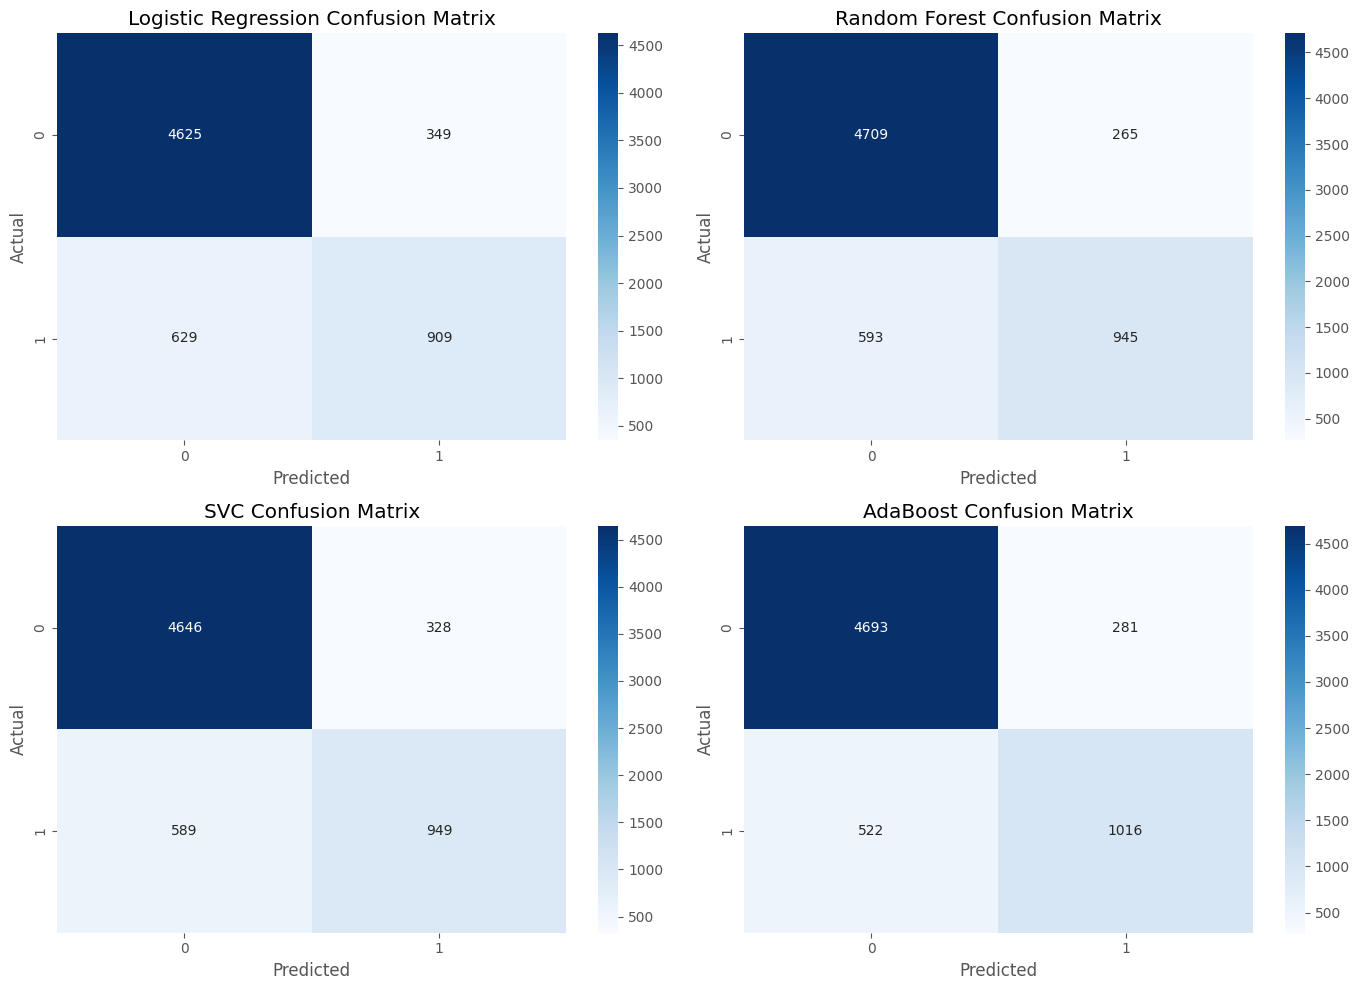

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, (name, result) in zip(axes, results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

Based on the confusion matrices, it is noticeable that some models are better at classifying one label compared to others. RandomForest, for example, is the one that most accurately classifies label 0, while AdaBoost is the one that most accurately classifies label 1. However, since the difference in accuracy is not very large between the models, this comparison alone is not decisive in choosing the best one.

### Comparison of performance metrics

/tmp/ipykernel_17/2620872714.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(metric_values.keys(), rotation=0)


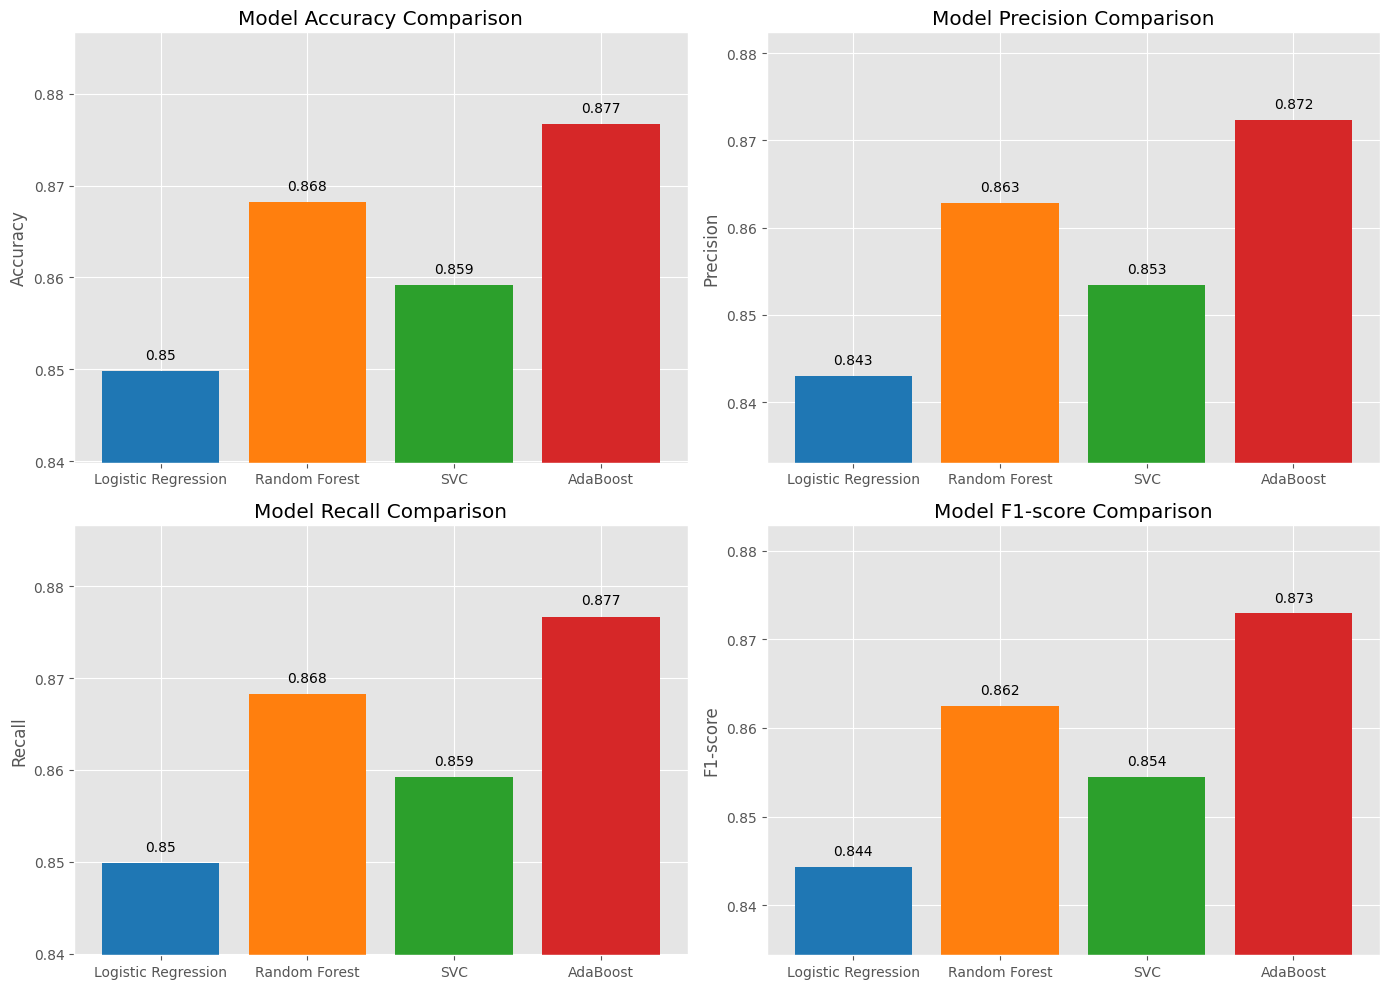

In [26]:
# Compare accuracy, precision, recall, and f1-score using subplots
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Custom colors for the bars
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    if metric == 'accuracy':
        metric_values = {name: result[metric] for name, result in results.items()}
    else:
        metric_values = {name: result['report']['weighted avg'][metric] for name, result in results.items()}
    
    bars = ax.bar(metric_values.keys(), metric_values.values(), color=colors)
    ax.set_title(f'Model {metric.capitalize()} Comparison')
    ax.set_ylabel(metric.capitalize())
    ax.set_xticklabels(metric_values.keys(), rotation=0)
    
    # Add value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 3), ha='center', va='bottom')
    
    # Adjust y-axis limits to highlight differences
    ax.set_ylim([min(metric_values.values()) - 0.01, max(metric_values.values()) + 0.01])

plt.tight_layout()
plt.show()

Here we see more concrete metrics that highlight the differences between the models. In general, the comparison of their performances follows the same pattern for the different metrics, models with a single classifier perform worse than those that take advantage of multiple classifiers, that is, Random Forest and AdaBoost are considered the best.

# 4 - Results

In [27]:
best_model = AdaBoostClassifier(**grid_search_ab.best_params_)
best_model.fit(X_all, y_all)

y_pred = best_model.predict(X_test)
y_pred = np.where(y_pred == 1, '>50K', '<=50K')
df_result = pd.DataFrame(({'Id':ids, 'income':y_pred}))
df_result.head()

,Id,income
0,0,<=50K
1,1,>50K
2,2,<=50K
3,3,<=50K
4,4,>50K


In [28]:
df_result.to_csv("submission.csv",index=False)